In [2]:
import h5py
import emcee
import matplotlib.pyplot as plt
import numpy as np
import corner

In [3]:
filename = "/scratch/sven/exoplanet_emcee_logs/emcee_N100_sigma0.1_f1.0gamma0.5rs5.0v1.h5"
reader = emcee.backends.HDFBackend(filename, read_only=True)

In [4]:
samples_data = reader.get_chain()
samples_data.shape

(6000, 150, 3)

In [5]:
param_labels = ['f', 'gamma', 'rs']

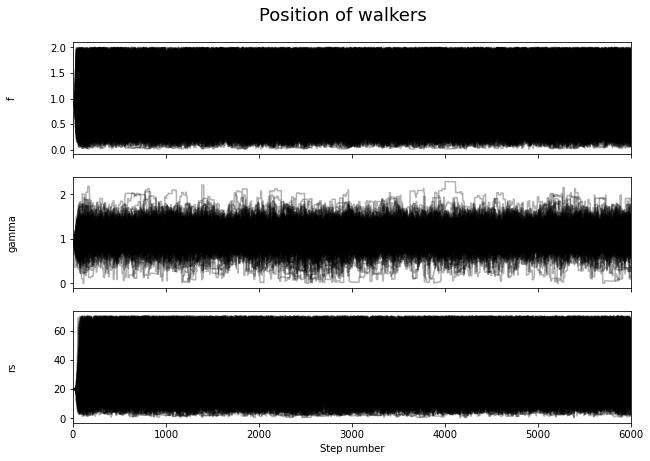

In [7]:
def plot_walkers(samples_data, param_labels):

    # Setup parameter labels
    num_parameters = len(param_labels)

    fig, axes = plt.subplots(num_parameters, figsize=(10, 7), sharex=True)

    fig.suptitle('Position of walkers', fontsize=18, y= 0.95)

    for i in range(num_parameters):

        ax = axes[i]
        ax.plot(samples_data[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples_data))
        ax.set_ylabel(param_labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)                                                 
        axes[-1].set_xlabel("Step number")

    #plt.savefig("Walkers_Plt_05052021", dpi=300)
    plt.show()

plot_walkers(samples_data, param_labels)

In [12]:
flat_samples = reader.get_chain(flat=True)
print(flat_samples.shape)

(900000, 3)


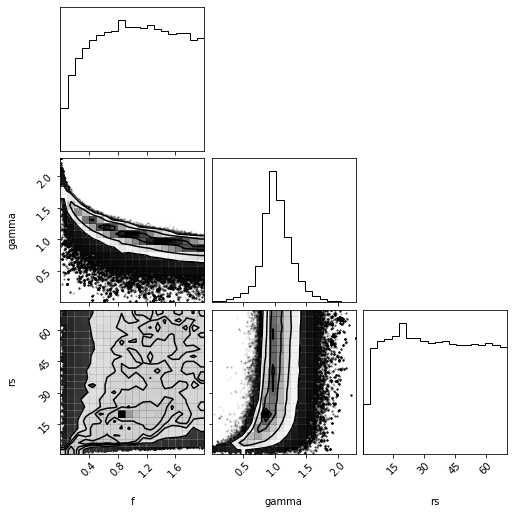

In [13]:
import corner

fig = corner.corner(
    flat_samples, labels=param_labels
)